# Image Augmentation techniques using GapML

## Fitting a Keras Convolutional Neural Network 


### Brief introduction how to get started

   #### Clone gapml repo from github
   git clone https://github.com/andrewferlitsch/Gap
   
   #### Run ```python3 setup.py```

   ####  **OR** Install miniconda and use PIP
   https://conda.io/miniconda.html

   #### Create virtual environment & Install gapml along with dependencies
- Create an environment with: conda create -n gap python==3.7 jupyter pip
- Activate: source activate gap
- pip install gapml

#### Exiting virtual environment when finished
- Windows: deactivate
- Linux/macOS: source deactivate

#### import the Gap Vision module


In [1]:
from gapml.vision import Image, Images

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/chrisheckler/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/chrisheckler/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### In this section we will demonstrate some individual image augmentation techniques and then show how they can be used at scale.

**Note** have a directory named 'tut' with a directory of images and each dir name starting from 0-9

In [2]:
""" For neural networks to avoid overfitting it is best to train your model with images
    that have levels of variation .  For example, lighting,
    color, and differing angles are all ways to avoid overfitting.
    
    Here, rotating the image is a simple way to add robustness to your training data.
    
    After running this cell, click on the image, press a key and minimize for now. 
"""

import cv2

image = Image('tut/1/40.png',1)

rotate = image.rotate(250)
cv2.imshow('image', rotate)
cv2.waitKey(0)

84

In [3]:
""" Another useful technique is to elimante color from your images and to remove the 3 RGB 
    channels by making your images 'grayscale'.  This is useful for simulating low light
    conditions and adding variation to your data.
    
    This is easily done using gapml and is shown below. 
"""

before_gray = gray = Image('tut/1/40.png',1)
gray = Image('tut/1/40.png',1, config=['grayscale'])


print('The shape before: ',before_gray.shape)
print('And after: ', gray.shape)

The shape before:  (399, 381, 3)
And after:  (399, 381)


In [4]:
""" Now lets get started with the good stuff and collect our labels.  This will be necessary
    when we are working with large amounts of data.
"""

import os

labels = [x for x in os.listdir('tut/')]
print(labels)

['9', '2', '3', '4', '6', '7', '1', '0', '8', '5']


### This section is where we tie everything together and process all of our images at once.  This simple script will take roughly 1/3 of our data and randomly rotate an image or apply the grayscale augmentation.

In [5]:
from random import randint, randrange

rotate_val = randint(-360,360)
img_count = 0
gray_count = 0
aug_count = 0
other_count = 0
img_coll = []

for label in labels:
    print('Processing images for label...', label)
    imgdir = 'tut/' +  label + '/'
    imglist = [imgdir + x for x in os.listdir(imgdir)]
    for img in range(len(imglist)):
        if randint(1,3) == 2:
            out_img = Image(imglist[img], int(label), config=['resize=(50,50)', 'grayscale', 'nostore'])
            img_coll.append(out_img)
            gray_count+=1
        elif randint(1,3) == 3:   
            out_img = Image(imglist[img], int(label), config=['resize=(50,50)', 'nostore'])
            out_img.augmentation = True
            rotated = out_img.rotate(randint(-350,350))
            img_coll.append(Image(rotated, out_img.label))
            aug_count+=1
        else:
            out_img = Image(imglist[img], int(label), config=['resize=(50,50)', 'nostore'])
            img_coll.append(out_img)
            other_count+=1
            
print('\n','Total images extracted: ', len(img_coll),'\n',
      'Grayscale images: ', gray_count,'\n',
      'Rotated imgages: ', aug_count,'\n',
      'Plain images: ', other_count)



Processing images for label... 9
Processing images for label... 2
Processing images for label... 3
Processing images for label... 4
Processing images for label... 6
Processing images for label... 7
Processing images for label... 1
Processing images for label... 0
Processing images for label... 8
Processing images for label... 5

 Total images extracted:  2379 
 Grayscale images:  786 
 Rotated imgages:  516 
 Plain images:  1077


In [6]:
""" Now that we have a collection of images that are either rotated, grayscaled or plain
    we can move on to splitting them into training and test data sets.
    
    First we need to combine this list of images into a single Images object.
"""

images = Images([x.data for x in img_coll], [x.label for x in img_coll]) 
print('Length of single images object: ',len(images))


Length of single images object:  2379


In [7]:
""" This just shows some features for some random images within this object.
"""
print('Shape: ', images[1500].shape,
      'Label: ', images[1500].label,
      'Size: ', images[1500].size)

print('Shape: ', images[2351].shape,
      'Label: ', images[2351].label,
      'Size: ', images[2351].size)

Shape:  (50, 50, 3) Label:  1 Size:  7500
Shape:  (50, 50, 3) Label:  5 Size:  7500


In [8]:
""" Here we split the data set into our training data with labels and our
    validation or test set with labels.  You can choose to split them anyway you like but
    I chose a 80/20 split.
"""

images.split = .2 , 125
Xtrain, Xtest, Ytrain, Ytest = images.split

print('Train count: ',len(images._train),'\n','Test count: ',len(images._test),'\n')
print("x_train", len(Xtrain))
print("y_train", len(Ytrain))
print("x_test", len(Xtest))
print("y_test", len(Ytest))

Train count:  1903 
 Test count:  476 

x_train 1903
y_train 1903
x_test 476
y_test 476


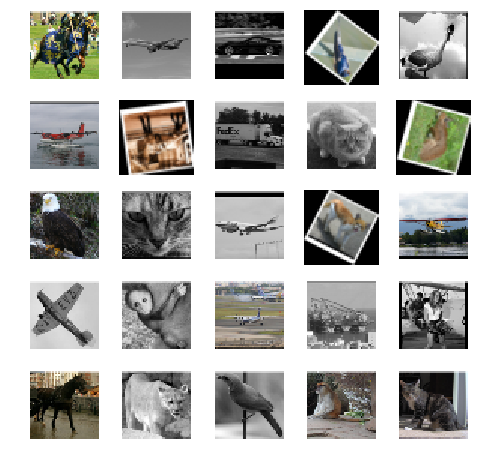

In [13]:
""" Here we get to look at some of the images that will be used for training.
    Notice the variation in rotated, grayscale and plain images.  This variation helps to prevent
    overfitting in our model.
"""

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import randint

fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img=Xtrain[randint(1,len(Xtrain))]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
""" Each element in Xtrain should be a numpy array.
    Each element should be in the shape 50 x 50 pixels
"""

print(type(Xtrain[0]))

print(Xtrain[0].shape)
print(Xtrain[2].shape)

<class 'numpy.ndarray'>
(50, 50, 3)
(50, 50, 3)


In [15]:
""" Each elment in Ytrain/Ytest should be the label and you can see the 10 different labels
    that will be used.
"""

print(Ytrain[0])
print(Ytest[50])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Using TensorFlow backend.


Train on 1903 samples, validate on 476 samples
Epoch 1/50
1903/1903 [==============================] - 3s 2ms/step - loss: 2.2785 - acc: 0.1498 - val_loss: 2.2461 - val_acc: 0.1849
Epoch 2/50
1903/1903 [==============================] - 3s 1ms/step - loss: 2.2387 - acc: 0.1823 - val_loss: 2.1982 - val_acc: 0.1849
Epoch 3/50
1903/1903 [==============================] - 3s 1ms/step - loss: 2.2004 - acc: 0.2013 - val_loss: 2.2131 - val_acc: 0.1786
Epoch 4/50
1903/1903 [==============================] - 3s 1ms/step - loss: 2.1857 - acc: 0.2049 - val_loss: 2.1567 - val_acc: 0.2920
Epoch 5/50
1903/1903 [==============================] - 3s 1ms/step - loss: 2.1382 - acc: 0.2365 - val_loss: 2.0808 - val_acc: 0.2521
Epoch 6/50
1903/1903 [==============================] - 3s 1ms/step - loss: 2.1054 - acc: 0.2475 - val_loss: 2.0938 - val_acc: 0.1849
Epoch 7/50
1903/1903 [==============================] - 3s 1ms/step - loss: 2.0730 - acc: 0.2664 - val_loss: 2.0208 - val_acc: 0.2647
Epoch 8/50
1903

Text(0.5,1,'Accuracy Curves')

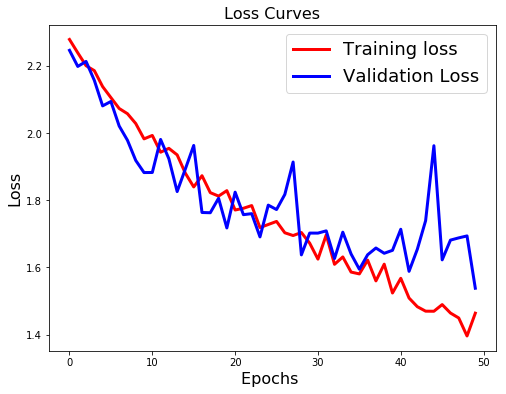

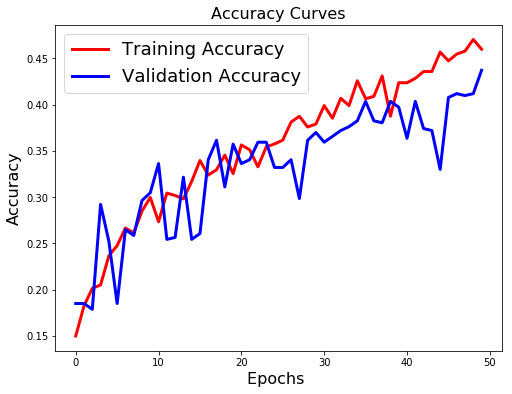

In [16]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import h5py


""" Convolutional layers are neurons that find features that stick out within an image. These 
    features are things such as corners or distinct shapes such as wing tips on a plane.
    When such features are found they will produce higher levels of activation.
    
    The kernel will slide over the 50x50x3 matrix and calculate a 3D array and choose 
    features with distinct outputs.  These features are usually higher level and neurons 
    deeper into the net and extract further information from these outputs and 
    result in greater detail acted on.
    
    Activation layers take the output from the previous layer and feed into the next.  A 
    neuron is applied to each location or pixel and in this case would be 50x50x1=2500 neurons.
    
    Pooling layers are used after Convolutional layers and reduce the number of parameters calculated
    to reduce model overfitting.
    
"""
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('sigmoid'))

batch_size = 250
epochs = 50
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
history = model.fit(Xtrain, Ytrain, verbose=1, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(Xtest,Ytest))
 
model.evaluate(Xtest, Ytest)
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


# References https://www.learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/

Using TensorFlow backend.


Train on 1903 samples, validate on 476 samples
Epoch 1/500
1903/1903 [==============================] - 11s 6ms/step - loss: 2.2969 - acc: 0.1650 - val_loss: 2.2854 - val_acc: 0.1471
Epoch 2/500
1903/1903 [==============================] - 11s 6ms/step - loss: 2.2544 - acc: 0.1766 - val_loss: 2.2547 - val_acc: 0.1471
Epoch 3/500
1903/1903 [==============================] - 11s 6ms/step - loss: 2.2157 - acc: 0.1818 - val_loss: 2.2384 - val_acc: 0.2080
Epoch 4/500
1903/1903 [==============================] - 11s 6ms/step - loss: 2.3070 - acc: 0.1813 - val_loss: 2.2529 - val_acc: 0.1849
Epoch 5/500
1903/1903 [==============================] - 11s 6ms/step - loss: 2.1934 - acc: 0.1986 - val_loss: 2.1846 - val_acc: 0.2227
Epoch 6/500
1903/1903 [==============================] - 11s 6ms/step - loss: 2.2574 - acc: 0.1876 - val_loss: 2.2328 - val_acc: 0.1870
Epoch 7/500
1903/1903 [==============================] - 11s 6ms/step - loss: 2.1935 - acc: 0.2123 - val_loss: 2.2231 - val_acc: 0.2059
E

Epoch 120/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.1396 - acc: 0.9485 - val_loss: 3.0487 - val_acc: 0.4517
Epoch 121/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.1861 - acc: 0.9359 - val_loss: 3.2887 - val_acc: 0.4370
Epoch 122/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.1579 - acc: 0.9522 - val_loss: 3.0303 - val_acc: 0.4328
Epoch 123/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.1383 - acc: 0.9543 - val_loss: 3.5187 - val_acc: 0.4013
Epoch 124/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.3294 - acc: 0.9012 - val_loss: 2.9739 - val_acc: 0.4496
Epoch 125/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.1225 - acc: 0.9574 - val_loss: 3.0264 - val_acc: 0.4538
Epoch 126/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.1165 - acc: 0.9616 - val_loss: 3.2315 - val_acc: 0.4517
Epoch 127/500
1903/1903 [=========

1903/1903 [==============================] - 10s 5ms/step - loss: 0.0468 - acc: 0.9858 - val_loss: 3.9022 - val_acc: 0.4496
Epoch 239/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.0503 - acc: 0.9827 - val_loss: 4.0650 - val_acc: 0.4412
Epoch 240/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.0501 - acc: 0.9832 - val_loss: 3.9477 - val_acc: 0.4475
Epoch 241/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.0514 - acc: 0.9837 - val_loss: 3.7497 - val_acc: 0.4601
Epoch 242/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.1764 - acc: 0.9453 - val_loss: 3.6314 - val_acc: 0.4622
Epoch 243/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.0416 - acc: 0.9879 - val_loss: 3.7103 - val_acc: 0.4433
Epoch 244/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.0378 - acc: 0.9895 - val_loss: 3.9325 - val_acc: 0.4328
Epoch 245/500
1903/1903 [=======================

1903/1903 [==============================] - 10s 6ms/step - loss: 0.0568 - acc: 0.9827 - val_loss: 3.9863 - val_acc: 0.4580
Epoch 357/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.0379 - acc: 0.9874 - val_loss: 3.9551 - val_acc: 0.4538
Epoch 358/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.0311 - acc: 0.9884 - val_loss: 4.3896 - val_acc: 0.4496
Epoch 359/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.0420 - acc: 0.9884 - val_loss: 4.5250 - val_acc: 0.4517
Epoch 360/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.0412 - acc: 0.9869 - val_loss: 4.4245 - val_acc: 0.4496
Epoch 361/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.0319 - acc: 0.9890 - val_loss: 4.6883 - val_acc: 0.4328
Epoch 362/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.0260 - acc: 0.9926 - val_loss: 4.3420 - val_acc: 0.4559
Epoch 363/500
1903/1903 [=======================

1903/1903 [==============================] - 10s 5ms/step - loss: 0.0384 - acc: 0.9890 - val_loss: 4.2006 - val_acc: 0.4454
Epoch 475/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.0223 - acc: 0.9916 - val_loss: 4.2597 - val_acc: 0.4433
Epoch 476/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.0335 - acc: 0.9895 - val_loss: 4.3350 - val_acc: 0.4517
Epoch 477/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.0665 - acc: 0.9811 - val_loss: 4.1335 - val_acc: 0.4538
Epoch 478/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.0292 - acc: 0.9895 - val_loss: 4.0376 - val_acc: 0.4580
Epoch 479/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.0290 - acc: 0.9905 - val_loss: 4.2784 - val_acc: 0.4475
Epoch 480/500
1903/1903 [==============================] - 10s 5ms/step - loss: 0.0217 - acc: 0.9921 - val_loss: 4.2075 - val_acc: 0.4559
Epoch 481/500
1903/1903 [=======================

Text(0.5,1,'Accuracy Curves')

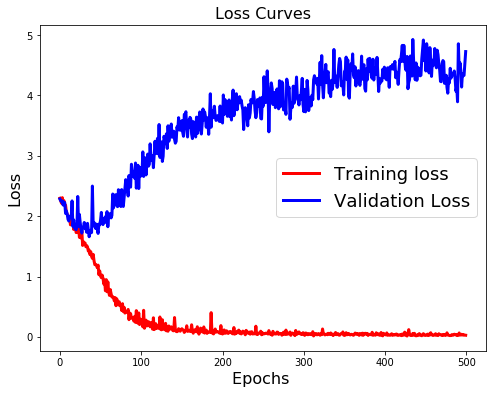

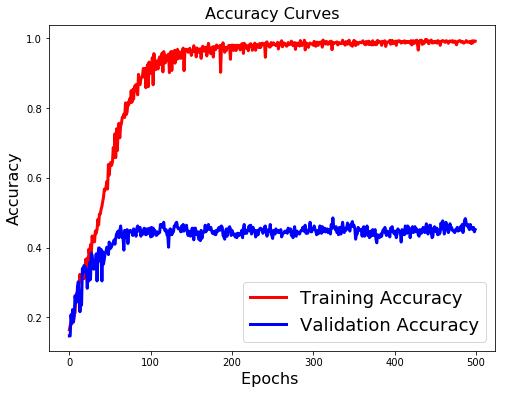

In [33]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import h5py


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(50, 50, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

batch_size = 250
epochs = 500
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
history = model.fit(Xtrain, Ytrain, verbose=1, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(Xtest,Ytest))
 
model.evaluate(Xtest, Ytest)
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
model.fit(Xtrain, Ytrain, verbose=1, epochs=10, batch_size=150, shuffle=False, validation_data=(Xtest,Ytest))
model.save_weights('first_try.h5') 